In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data
df=pd.read_csv('PenDigits_withoutdupl_norm_v01.csv')  

del df['id']
del df['Unnamed: 0']
df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)

df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,outlier
0,48.0,100.0,20.0,80.0,0.0,51.0,55.0,43.0,100.0,56.0,90.0,62.0,86.0,30.0,73.0,0.0,1
1,38.0,100.0,4.0,85.0,0.0,53.0,58.0,46.0,100.0,52.0,88.0,64.0,78.0,32.0,73.0,0.0,1
2,53.0,100.0,25.0,70.0,0.0,39.0,50.0,34.0,100.0,42.0,85.0,64.0,77.0,32.0,80.0,0.0,1
3,12.0,100.0,0.0,71.0,25.0,43.0,86.0,44.0,100.0,75.0,90.0,52.0,90.0,20.0,90.0,0.0,1
4,26.0,100.0,0.0,83.0,23.0,51.0,83.0,42.0,100.0,55.0,79.0,84.0,56.0,42.0,37.0,0.0,1


In [3]:
# df to values
df = df.values

In [4]:
# CascadeExtraTrees  
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/PenDigits.json")  
gc = GCForest(config)

In [5]:
# train test
from sklearn.cross_validation import train_test_split
y = df[:,16]
X = df[:,0:16]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# count class
len(np.unique(y_train))

2

In [7]:
  # X_enc is the concatenated predict_proba result of CascadeExtraTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
  

[ 2018-07-30 23:06:42,618][cascade_classifier.fit_transform] X_groups_train.shape=[(6907, 16)],y_train.shape=(6907,),X_groups_test.shape=[(2961, 16)],y_test.shape=(2961,)
[ 2018-07-30 23:06:42,619][cascade_classifier.fit_transform] group_dims=[16]
[ 2018-07-30 23:06:42,621][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 23:06:42,622][cascade_classifier.fit_transform] group_ends=[16]
[ 2018-07-30 23:06:42,622][cascade_classifier.fit_transform] X_train.shape=(6907, 16),X_test.shape=(2961, 16)
[ 2018-07-30 23:06:42,624][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 16), X_cur_test.shape=(2961, 16)
[ 2018-07-30 23:06:43,210][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:06:43,937][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:06:44,803][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0

In [8]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-30 23:06:50,679][cascade_classifier.transform] X_groups_test.shape=[(2961, 16)]
[ 2018-07-30 23:06:50,680][cascade_classifier.transform] group_dims=[16]
[ 2018-07-30 23:06:50,681][cascade_classifier.transform] X_test.shape=(2961, 16)
[ 2018-07-30 23:06:50,682][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(2961, 16)


Test Accuracy of CascadeExtraTrees = 99.966228 %
[[2957    0]
 [   1    3]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      0.75      0.86         4

avg / total       1.00      1.00      1.00      2961



In [9]:
#  predict_proba + Data 
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-30 23:06:52,915][cascade_classifier.transform] X_groups_test.shape=[(2961, 16)]
[ 2018-07-30 23:06:52,916][cascade_classifier.transform] group_dims=[16]
[ 2018-07-30 23:06:52,917][cascade_classifier.transform] X_test.shape=(2961, 16)
[ 2018-07-30 23:06:52,918][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(2961, 16)


In [10]:
# New data
X_train_new = X_train_enc
X_test_new  = X_test_enc

In [11]:
X_test_new.shape

(2961, 18)

In [12]:
X_train_new.shape

(6907, 18)

In [13]:
# Cascade ExtraTrees
config = load_json("./examples/PenDigitsgc.json")  
gc = GCForest(config)

X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-30 23:06:55,162][cascade_classifier.fit_transform] X_groups_train.shape=[(6907, 18)],y_train.shape=(6907,),X_groups_test.shape=[(2961, 18)],y_test.shape=(2961,)
[ 2018-07-30 23:06:55,163][cascade_classifier.fit_transform] group_dims=[18]
[ 2018-07-30 23:06:55,164][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 23:06:55,165][cascade_classifier.fit_transform] group_ends=[18]
[ 2018-07-30 23:06:55,166][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:06:55,167][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)
[ 2018-07-30 23:06:55,673][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:06:56,393][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:06:57,126][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0

In [14]:
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-30 23:07:27,904][cascade_classifier.transform] X_groups_test.shape=[(2961, 18)]
[ 2018-07-30 23:07:27,905][cascade_classifier.transform] group_dims=[18]
[ 2018-07-30 23:07:27,906][cascade_classifier.transform] X_test.shape=(2961, 18)
[ 2018-07-30 23:07:27,908][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(2961, 18)


Test Accuracy of CascadeExtraTrees = 100.000000 %
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961



In [15]:
# CascadeExtraTrees
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))   
    
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    
    config = load_json("./examples/PenDigitsgc.json")  
    gc = GCForest(config)
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) 
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")

[ 2018-07-30 23:07:30,174][cascade_classifier.fit_transform] X_groups_train.shape=[(6907, 18)],y_train.shape=(6907,),X_groups_test.shape=[(2961, 18)],y_test.shape=(2961,)
[ 2018-07-30 23:07:30,175][cascade_classifier.fit_transform] group_dims=[18]
[ 2018-07-30 23:07:30,176][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 23:07:30,177][cascade_classifier.fit_transform] group_ends=[18]
[ 2018-07-30 23:07:30,178][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:07:30,179][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)
[ 2018-07-30 23:07:30,690][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:07:31,413][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:07:32,252][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0

[ 2018-07-30 23:08:02,876][cascade_classifier.transform] group_dims=[18]
[ 2018-07-30 23:08:02,877][cascade_classifier.transform] X_test.shape=(2961, 18)
[ 2018-07-30 23:08:02,878][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(2961, 18)
[ 2018-07-30 23:08:05,143][cascade_classifier.fit_transform] X_groups_train.shape=[(6907, 18)],y_train.shape=(6907,),X_groups_test.shape=[(2961, 18)],y_test.shape=(2961,)
[ 2018-07-30 23:08:05,145][cascade_classifier.fit_transform] group_dims=[18]
[ 2018-07-30 23:08:05,145][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 23:08:05,146][cascade_classifier.fit_transform] group_ends=[18]
[ 2018-07-30 23:08:05,147][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:08:05,148][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 0)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '32.704', ' seconds')


[ 2018-07-30 23:08:05,655][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:08:06,376][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:08:07,096][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-30 23:08:07,703][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.71%
[ 2018-07-30 23:08:08,419][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.86%
[ 2018-07-30 23:08:09,138][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:08:09,862][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-30 23:08:10,589][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99

[ 2018-07-30 23:08:38,146][cascade_classifier.fit_transform] group_ends=[18]
[ 2018-07-30 23:08:38,147][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:08:38,148][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 1)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '30.777', ' seconds')


[ 2018-07-30 23:08:38,659][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:08:39,496][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:08:40,342][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-30 23:08:41,065][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.71%
[ 2018-07-30 23:08:41,795][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.86%
[ 2018-07-30 23:08:42,634][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:08:43,361][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-30 23:08:44,069][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99

[ 2018-07-30 23:09:10,669][cascade_classifier.fit_transform] group_ends=[18]
[ 2018-07-30 23:09:10,670][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:09:10,671][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 2)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '30.289', ' seconds')


[ 2018-07-30 23:09:11,176][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:09:11,900][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:09:12,625][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-30 23:09:13,347][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.71%
[ 2018-07-30 23:09:14,073][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.71%
[ 2018-07-30 23:09:14,799][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:09:15,524][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-30 23:09:16,373][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99

[ 2018-07-30 23:09:43,987][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:09:43,989][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 3)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '31.209', ' seconds')


[ 2018-07-30 23:09:44,614][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:09:45,457][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:09:46,186][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:09:46,905][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.71%
[ 2018-07-30 23:09:47,667][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.86%
[ 2018-07-30 23:09:48,388][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:09:49,226][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-30 23:09:49,951][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.

[ 2018-07-30 23:10:20,805][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.86%
[ 2018-07-30 23:10:21,723][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.86%
[ 2018-07-30 23:10:22,811][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=100.00%
[ 2018-07-30 23:10:23,922][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=100.00%
[ 2018-07-30 23:10:24,174][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=99.93%
[ 2018-07-30 23:10:24,175][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=100.00%
[ 2018-07-30 23:10:24,177][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=99.93%
[ 2018-07-30 23:10:24,178][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=100.00%
[ 2018-07-30 23:10:24,1

('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 4)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '65.692', ' seconds')


[ 2018-07-30 23:11:01,355][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:11:02,193][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:11:02,916][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:11:03,639][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.57%
[ 2018-07-30 23:11:04,487][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-30 23:11:05,375][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:11:06,293][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.86%
[ 2018-07-30 23:11:07,354][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.

[ 2018-07-30 23:11:37,824][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.86%
[ 2018-07-30 23:11:38,542][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=100.00%
[ 2018-07-30 23:11:39,384][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=100.00%
[ 2018-07-30 23:11:40,110][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=99.86%
[ 2018-07-30 23:11:40,332][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=99.90%
[ 2018-07-30 23:11:40,333][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=100.00%
[ 2018-07-30 23:11:40,334][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=99.90%
[ 2018-07-30 23:11:40,335][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=100.00%
[ 2018-07-30 23:11:40,3

('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 5)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '39.505', ' seconds')


[ 2018-07-30 23:11:45,496][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.86%
[ 2018-07-30 23:11:46,330][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:11:47,060][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:11:47,897][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.57%
[ 2018-07-30 23:11:48,734][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-30 23:11:49,456][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:11:50,188][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.86%
[ 2018-07-30 23:11:51,029][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.8

[ 2018-07-30 23:12:18,971][cascade_classifier.fit_transform] group_ends=[18]
[ 2018-07-30 23:12:18,972][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:12:18,973][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 6)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '31.875', ' seconds')


[ 2018-07-30 23:12:19,592][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.86%
[ 2018-07-30 23:12:20,539][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:12:21,516][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:12:22,469][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.57%
[ 2018-07-30 23:12:23,205][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-30 23:12:23,929][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:12:24,771][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-30 23:12:25,494][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.

[ 2018-07-30 23:12:53,111][cascade_classifier.fit_transform] group_ends=[18]
[ 2018-07-30 23:12:53,112][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:12:53,114][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 7)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '31.873', ' seconds')


[ 2018-07-30 23:12:53,829][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.86%
[ 2018-07-30 23:12:54,832][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:12:55,693][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:12:56,586][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.57%
[ 2018-07-30 23:12:57,646][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.86%
[ 2018-07-30 23:12:58,618][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:12:59,533][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-30 23:13:00,434][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.7

[ 2018-07-30 23:13:29,904][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:13:29,905][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 8)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '34.57', ' seconds')


[ 2018-07-30 23:13:30,413][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.86%
[ 2018-07-30 23:13:31,133][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:13:31,741][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:13:32,462][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.57%
[ 2018-07-30 23:13:33,188][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.86%
[ 2018-07-30 23:13:34,028][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:13:34,871][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.86%
[ 2018-07-30 23:13:35,605][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.71

[ 2018-07-30 23:14:05,434][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.86%
[ 2018-07-30 23:14:06,159][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.86%
[ 2018-07-30 23:14:06,889][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=99.86%
[ 2018-07-30 23:14:07,620][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=99.86%
[ 2018-07-30 23:14:07,842][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=99.84%
[ 2018-07-30 23:14:07,844][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=100.00%
[ 2018-07-30 23:14:07,845][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=99.84%
[ 2018-07-30 23:14:07,846][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=100.00%
[ 2018-07-30 23:14:07,846

('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 9)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '37.953', ' seconds')


[ 2018-07-30 23:14:12,824][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:14:13,659][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:14:14,492][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:14:15,211][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.57%
[ 2018-07-30 23:14:16,069][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.86%
[ 2018-07-30 23:14:16,922][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:14:17,684][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-30 23:14:18,528][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.

[ 2018-07-30 23:14:45,613][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:14:45,614][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 10)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '31.183', ' seconds')


[ 2018-07-30 23:14:46,123][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.86%
[ 2018-07-30 23:14:46,962][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:14:47,685][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:14:48,402][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.57%
[ 2018-07-30 23:14:49,239][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.71%
[ 2018-07-30 23:14:49,956][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:14:50,678][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-30 23:14:51,400][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.8

[ 2018-07-30 23:15:20,994][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.86%
[ 2018-07-30 23:15:21,863][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.86%
[ 2018-07-30 23:15:22,735][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=99.86%
[ 2018-07-30 23:15:23,588][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=99.86%
[ 2018-07-30 23:15:23,812][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=99.86%
[ 2018-07-30 23:15:23,813][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=100.00%
[ 2018-07-30 23:15:23,814][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=99.86%
[ 2018-07-30 23:15:23,815][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=100.00%
[ 2018-07-30 23:15:23,817

('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 11)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '45.742', ' seconds')


[ 2018-07-30 23:15:38,319][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:15:39,159][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:15:39,883][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:15:40,721][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.71%
[ 2018-07-30 23:15:41,566][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-30 23:15:42,422][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:15:43,154][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.86%
[ 2018-07-30 23:15:43,880][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100

[ 2018-07-30 23:16:16,006][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.86%
[ 2018-07-30 23:16:16,885][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=100.00%
[ 2018-07-30 23:16:17,997][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=100.00%
[ 2018-07-30 23:16:18,846][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=100.00%
[ 2018-07-30 23:16:19,088][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=99.96%
[ 2018-07-30 23:16:19,090][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=99.97%
[ 2018-07-30 23:16:19,094][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=99.96%
[ 2018-07-30 23:16:19,097][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=99.97%
[ 2018-07-30 23:16:19,09

('Test Accuracy of CascadeExtraTrees = 99.966228 %', 'Layer :', 12)
[[2957    0]
 [   1    3]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      0.75      0.86         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '41.302', ' seconds')


[ 2018-07-30 23:16:24,455][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:16:25,221][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:16:25,953][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:16:26,794][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.71%
[ 2018-07-30 23:16:27,518][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-30 23:16:28,245][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:16:28,969][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-30 23:16:29,800][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=10

[ 2018-07-30 23:16:58,257][cascade_classifier.fit_transform] group_ends=[18]
[ 2018-07-30 23:16:58,258][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:16:58,260][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 99.966228 %', 'Layer :', 13)
[[2957    0]
 [   1    3]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      0.75      0.86         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '32.244', ' seconds')


[ 2018-07-30 23:16:58,763][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:16:59,481][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:17:00,197][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:17:01,032][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.71%
[ 2018-07-30 23:17:01,878][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-30 23:17:02,599][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:17:03,326][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-30 23:17:04,158][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=10

[ 2018-07-30 23:17:31,773][cascade_classifier.fit_transform] group_ends=[18]
[ 2018-07-30 23:17:31,774][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:17:31,775][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 99.966228 %', 'Layer :', 14)
[[2957    0]
 [   1    3]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      0.75      0.86         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '31.238', ' seconds')


[ 2018-07-30 23:17:32,416][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:17:33,468][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:17:34,445][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:17:35,220][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.71%
[ 2018-07-30 23:17:36,053][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-30 23:17:36,762][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:17:37,484][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-30 23:17:38,204][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=10

[ 2018-07-30 23:18:05,841][cascade_classifier.fit_transform] group_ends=[18]
[ 2018-07-30 23:18:05,843][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:18:05,846][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 99.966228 %', 'Layer :', 15)
[[2957    0]
 [   1    3]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      0.75      0.86         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '31.747', ' seconds')


[ 2018-07-30 23:18:06,660][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:18:07,505][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:18:08,419][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:18:09,520][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.71%
[ 2018-07-30 23:18:10,535][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.86%
[ 2018-07-30 23:18:11,504][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:18:12,372][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.86%
[ 2018-07-30 23:18:13,228][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.

[ 2018-07-30 23:18:41,274][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:18:41,276][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 99.966228 %', 'Layer :', 16)
[[2957    0]
 [   1    3]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      0.75      0.86         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '33.227', ' seconds')


[ 2018-07-30 23:18:41,781][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:18:42,505][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:18:43,214][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:18:44,050][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.71%
[ 2018-07-30 23:18:44,889][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.86%
[ 2018-07-30 23:18:45,730][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-30 23:18:46,458][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.86%
[ 2018-07-30 23:18:47,300][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.

[ 2018-07-30 23:19:13,927][cascade_classifier.fit_transform] group_ends=[18]
[ 2018-07-30 23:19:13,928][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:19:13,929][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 17)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '30.437', ' seconds')


[ 2018-07-30 23:19:14,435][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:19:15,159][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:19:15,889][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:19:16,728][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.71%
[ 2018-07-30 23:19:17,631][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.86%
[ 2018-07-30 23:19:18,531][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.86%
[ 2018-07-30 23:19:19,388][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.86%
[ 2018-07-30 23:19:20,216][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.0

[ 2018-07-30 23:19:47,610][cascade_classifier.fit_transform] group_ends=[18]
[ 2018-07-30 23:19:47,611][cascade_classifier.fit_transform] X_train.shape=(6907, 18),X_test.shape=(2961, 18)
[ 2018-07-30 23:19:47,613][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(6907, 18), X_cur_test.shape=(2961, 18)


('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 18)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '31.455', ' seconds')


[ 2018-07-30 23:19:48,129][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 23:19:48,726][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 23:19:49,449][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.86%
[ 2018-07-30 23:19:50,169][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.71%
[ 2018-07-30 23:19:50,893][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.86%
[ 2018-07-30 23:19:51,735][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.86%
[ 2018-07-30 23:19:52,581][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-30 23:19:53,306][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.

('Test Accuracy of CascadeExtraTrees = 100.000000 %', 'Layer :', 19)
[[2957    0]
 [   0    4]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2957
        1.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00      2961

(' Time ', '29.656', ' seconds')


('Opt_Cascade_num =', 0, ' Accuracy =', 100.0, 'Time =', 32.700000000000003)


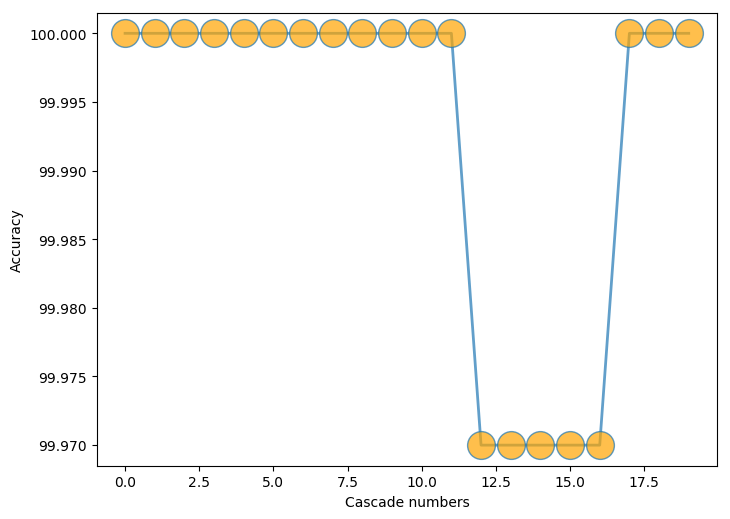

In [16]:
print ("Opt_Cascade_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Cascade numbers')
plt.show()

In [17]:
Accuracy

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.97,
 99.97,
 99.97,
 99.97,
 99.97,
 100.0,
 100.0,
 100.0]